In [11]:
import pickle
import dynetworkx as dnx
import pandas as pd
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
import datetime
import powerlaw

In [13]:
with open('temp/graphs.pickle','rb') as f:
    graphs = pickle.load(f)

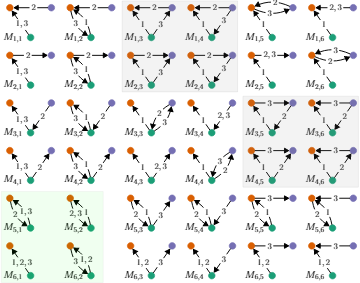

Figure credit: Paranjape, A., Benson, A.R., Leskovec, J.: Motifs in temporal networks. In: Proceedings of the Tenth ACM International Conference on Web Search and Data Mining, pp. 601-610.  (2017) 

In [14]:
# This list all of the edge orders for the motifs in the table above
motifs = [[((1,2),(3,2),(1,2)), ((1,2),(3,2),(2,1)), ((1,2),(3,2),(1,3)), ((1,2),(3,2),(3,1)), ((1,2),(3,2),(2,3)), ((1,2),(3,2),(3,2))],
          [((1,2),(2,3),(1,2)), ((1,2),(2,3),(2,1)), ((1,2),(2,3),(1,3)), ((1,2),(2,3),(3,1)), ((1,2),(2,3),(2,3)), ((1,2),(2,3),(3,2))],
          [((1,2),(3,1),(1,2)), ((1,2),(3,1),(2,1)), ((1,2),(3,1),(1,3)), ((1,2),(3,1),(3,1)), ((1,2),(3,1),(2,3)), ((1,2),(3,1),(3,2))],
          [((1,2),(1,3),(1,2)), ((1,2),(1,3),(2,1)), ((1,2),(1,3),(1,3)), ((1,2),(1,3),(3,1)), ((1,2),(1,3),(2,3)), ((1,2),(1,3),(3,2))],
          [((1,2),(2,1),(1,2)), ((1,2),(2,1),(2,1)), ((1,2),(2,1),(1,3)), ((1,2),(2,1),(3,1)), ((1,2),(2,1),(2,3)), ((1,2),(2,1),(3,2))],
          [((1,2),(1,2),(1,2)), ((1,2),(1,2),(2,1)), ((1,2),(1,2),(1,3)), ((1,2),(1,2),(3,1)), ((1,2),(1,2),(2,3)), ((1,2),(1,2),(3,2))]]

mot = [ seq for row in motifs for seq in row]

# Calculate motifs

In [15]:
table = list()
dict_table = list()

for g in graphs:
    count_dict = list()
    pool = mp.Pool(mp.cpu_count())
    results = pool.starmap_async(dnx.count_temporal_motif, [(g, seq, 7*86400, True) for seq in mot]).get()
    pool.close()
    
    count_dict = [results[0:6], results[6:12], results[12:18], results[18:24], results[24:30], results[30:36]]
    dict_table.append(count_dict)
    
    count = list()
    for d in results:
        count.append(sum(d.values()))
    table.append(count)
    
count_table = pd.DataFrame(table, columns=range(1,37))

In [17]:
count_table # 10 graphs x 36 motif types

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
0,9133,270,30,22,315,6423,333,101,23,2,...,132,409,161,358,1884,298,947,191,392,6807
1,9190,291,30,22,295,6406,336,100,20,2,...,130,433,162,364,1851,297,945,205,392,6786
2,9139,288,27,24,297,6394,337,101,19,2,...,131,425,161,345,1838,296,946,206,392,6801
3,9196,303,30,21,280,6396,335,100,19,2,...,131,442,161,356,1862,299,941,204,393,6798
4,9191,290,28,23,294,6422,337,100,22,2,...,130,431,161,358,1855,299,942,203,393,6750
5,9170,283,29,23,302,6391,333,101,20,2,...,131,429,161,356,1869,299,948,202,392,6785
6,9172,264,30,22,321,6388,335,100,20,2,...,130,415,162,357,1871,299,943,205,393,6845
7,9269,307,30,22,278,6429,336,100,23,2,...,129,447,162,354,1860,296,944,200,393,6686
8,9262,295,28,24,286,6390,334,101,23,2,...,131,416,162,351,1865,293,946,204,393,6711
9,9156,298,27,24,285,6312,336,101,20,2,...,131,432,162,355,1875,294,947,197,392,6876


In [68]:
with open('temp/count_result.pickle','wb') as f:
    pickle.dump(count_table, f)
    
with open('temp/dictionary_result.pickle','wb') as f:
    pickle.dump(dict_table, f)

# Average count for each motif types

In [ ]:
with open('temp/count_result.pickle','rb') as f:
    count_table = pickle.load(f)

In [ ]:
with open('temp/dictionary_result.pickle','rb') as f:
    dict_table = pickle.load(f)

<ipython-input-20-f71efb25a1ca>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(row)
<ipython-input-20-f71efb25a1ca>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(column)


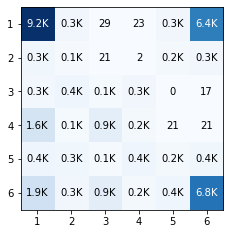

In [20]:
###
a = count_table.mean(axis=0)
noise_count = [list(a[0:6]), list(a[6:12]), list(a[12:18]), list(a[18:24]), list(a[24:30]), list(a[30:36])]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,2,1)
ax.imshow(noise_count, cmap='Blues')

column = range(7)
row = range(7)
ax.set_xticklabels(row)
ax.set_yticklabels(column)

for i in range(len(noise_count)):
    for j in range(len(noise_count[i])):
        if noise_count[i][j] >= 100000:
            label_text = str(np.round(noise_count[i][j]/10**6,1)) + 'M'
        elif noise_count[i][j] >= 100:
            label_text = str(np.round(noise_count[i][j]/10**3,1)) + 'K'
        else:
            label_text = str(int(np.round(noise_count[i][j], 0)))

        if noise_count[i][j] < np.average(noise_count) *2.1:
            text = ax.text(j, i, label_text,
                           ha="center", va="center", color='k')
        else:
            text = ax.text(j, i, label_text,
               ha="center", va="center", color='w')

fig.savefig('figures/average_count.svg', format='svg')

# Motif roles

In [44]:
def count_role(count_dict, row_i, col_i ,role_i):
    countries = list()
    count = list()

    for country in graphs[0].nodes():
        c = 0
        for key, co in count_dict[row_i][col_i].items():
            if country in key[role_i]:
                c = c + co
        countries.append(country)
        count.append(c)

    return pd.Series(count, countries)

def get_role_average(dict_table, row_i, col_i, role_i):
    series_list = list()
    for d in dict_table:
        series_list.append(count_role(d, row_i, col_i, role_i))
    
    a = pd.concat(series_list, axis=1)
    mean = pd.Series(a.mean(axis=1), name='mean')
    std = pd.Series(a.std(axis=1), name='std')
    
    return pd.concat([mean, std], axis=1)

def plot_role(dict_table, row_is, col_is, role_i1s, role_i2s, role_i3s=None):
    colors = ['#7fc3c0', '#cfb845', '#141414'] 
    ### create plots ###
    fig = plt.figure(figsize=(16,10/3))
    width = 0.2
    motif_string = []
    for i in range(len(row_is)):
        motif_string.append('M{}{}'.format(row_is[i]+1, col_is[i]+1))

    if not role_i3s is None:
        ax = fig.add_subplot(1,3,1)
        ax2 = fig.add_subplot(1,3,2)
        ax3 = fig.add_subplot(1,3,3)

        ax.tick_params(axis='x', labelsize=15 )
        ax2.tick_params(axis='x', labelsize=15 )
        ax3.tick_params(axis='x', labelsize=15 )
    else:
        ax = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        ax.tick_params(axis='x', labelsize=15 )
        ax2.tick_params(axis='x', labelsize=15 )

    ax.tick_params(axis='y', labelsize=12 )

    ax.set_title('Role 1', fontsize = 17)
    ax2.set_title('Role 2', fontsize= 17)
    if not role_i3s is None:
        ax3.set_title('Role 3', fontsize=17)

    ### get values ###
    agg1 = list()
    agg2 = list()
    agg3 = list()
    for i in range(len(row_is)):
        row_i = row_is[i] 
        col_i = col_is[i]
        role_i1 = role_i1s[i]
        role_i2 = role_i2s[i]
        if not role_i3s is None:
            role_i3 = role_i3s[i]

        # get values
        role_1 = get_role_average(dict_table, row_i, col_i, role_i1)
        role_2 = get_role_average(dict_table, row_i, col_i, role_i2)
        agg1.append(role_1['mean'])
        agg2.append(role_2['mean'])

        if not role_i3s is None:
            role_3 = get_role_average(dict_table, row_i, col_i, role_i3)
            agg3.append(role_3['mean'])

    agg1 = pd.concat(agg1, axis=1)
    agg1['mean_average'] = agg1.mean(axis=1)
    agg1 = agg1.sort_values(by='mean_average', ascending=False)

    agg2 = pd.concat(agg2, axis=1)
    agg2['mean_average'] = agg2.mean(axis=1)
    agg2 = agg2.sort_values(by='mean_average', ascending=False)

    if not role_i3s is None:
        agg3 = pd.concat(agg3, axis=1)
        agg3['mean_average'] = agg3.mean(axis=1)
        agg3 = agg3.sort_values(by='mean_average', ascending=False)

    ### plot ###
    for i in range(len(row_is)):
        x = np.arange(5)
        if len(row_is) != 1:
            ax.set_xticks(x+0.2)
            ax.set_xticklabels(agg1.iloc[:5,i].index)
            ax.bar(x + (width * i), agg1.iloc[:5,i], width, 
                   label='M{}{}'.format(row_is[i]+1, col_is[i]+1), color=colors[i])

            ax2.set_xticks(x+0.2)
            ax2.set_xticklabels(agg2.iloc[:5,i].index)    
            ax2.bar(x + (width * i), agg2.iloc[:5,i], width, color=colors[i])

            if not role_i3s is None:
                ax3.set_xticks(x+0.2)
                ax3.set_xticklabels(agg3.iloc[:5,i].index)    
                ax3.bar(x + (width * i), agg3.iloc[:5,i], width, color=colors[i])

        else: # This is for plotting single motif type
            ax.bar(agg1.iloc[:5,i].index, agg1.iloc[:5,i], label='M{}{}'.format(row_is[i]+1, col_is[i]+1),
                   color=colors[i])

            ax2.bar(agg2.iloc[:5,i].index, agg2.iloc[:5,i], color=colors[i])

    ax.legend()
    return fig

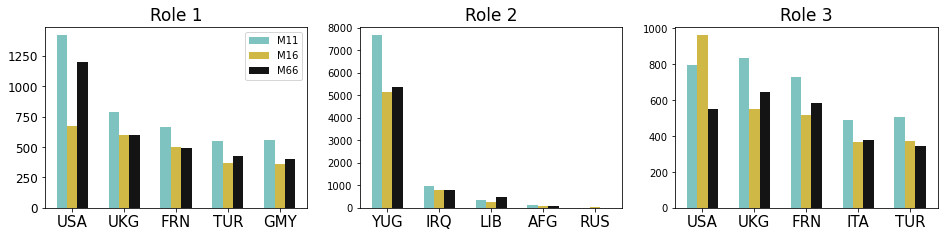

In [45]:
# Motifs M11, M16, M66
fig = plot_role(dict_table, [0,0,5], [0,5,5], [0,0,0], [1,1,1], [2,2,4]);
fig.savefig('figures/M11_M16_M66.svg', format='svg')

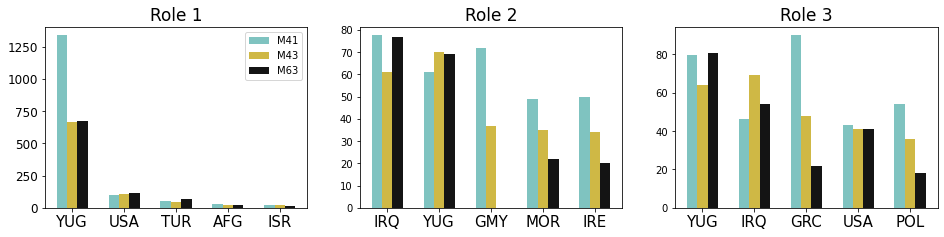

In [46]:
# Motifs M41, M43, M63
fig = plot_role(dict_table, [3,3,5], [0,2,2], [0,0,0], [1,1,1], [3,3,5])
fig.savefig('figures/M41_M43_M63.svg', format='svg')

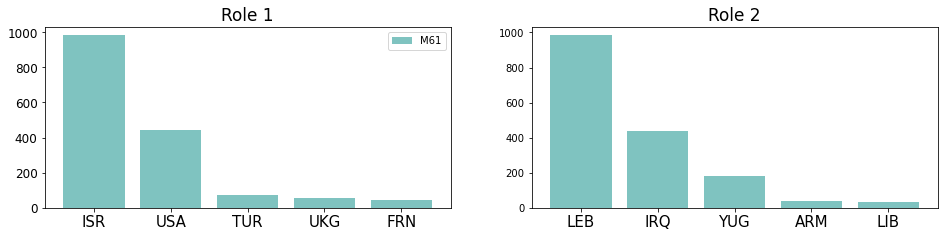

In [48]:
# Motifs M61
fig = plot_role(dict_table, [5], [0], [0], [1])
fig.savefig('figures/M61.svg', format='svg')

# Motifs by year

In [50]:
# calculate motifs with delta=7 for each year
def get_count_frame(begin, end):

    table = list()

    for g in graphs:
        edges = g.edges(begin=begin, end=end)
        Gtmp = dnx.ImpulseDiGraph()
        for edge in edges:
            Gtmp.add_edge(edge[0], edge[1], edge[2])
        
        count_dict = list()
        pool = mp.Pool(mp.cpu_count())
        results = pool.starmap_async(dnx.count_temporal_motif, [(Gtmp, seq, 7*86400, True) for seq in mot]).get()
        pool.close()

        count = list()
        for d in results:
            count.append(sum(d.values()))
        table.append(count)

    count_table = pd.DataFrame(table, columns=range(1,37))    
    a = count_table.mean(axis=0)
    count = [list(a[0:6]), list(a[6:12]), list(a[12:18]), list(a[18:24]), list(a[24:30]), list(a[30:36])]
        
    return count

# get motif count frames for each year
frames = list()
count_dict_list = list()
for year in range(1992, 2015):
    begin = datetime.datetime(year, 1, 1).timestamp()
    end = datetime.datetime(year + 1, 1, 1).timestamp()
    
    c = get_count_frame(begin, end)
    
    frames.append((c, year))

In [52]:
with open('temp/frames.pickle','wb') as f:
    pickle.dump(frames, f)

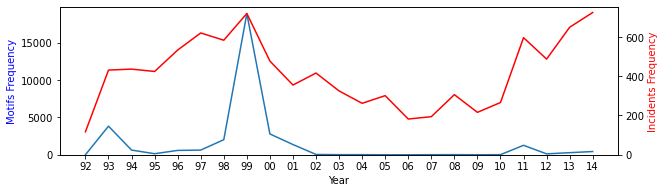

In [55]:
### motifs by year distribution
years = list()
total = list()

with open('temp/frames.pickle','rb') as f:
     frames = pickle.load(f)

for frame, year in frames:
    total.append(np.sum(frame))
    years.append(year)

fig = plt.figure(figsize=(10,6))

# Motifs frequency
ax = fig.add_subplot(211)
ax.plot(years, total, label='Motifs')

ax.set_ylabel('Motifs Frequency', color='b')
ax.set_ylim(bottom=0)
ax.set_xlabel('Year')

MIDIP = pd.read_csv('Incident_Level_5_01/MIDIP_5.01.csv')
a = MIDIP['styear'].value_counts().sort_index()

# Incidents frequency
ax1 = ax.twinx()
ax1.set_ylabel('Incidents Frequency', color='red')
ax1.plot(a.index,a, label='Incidents', color='r')
ax1.set_xticks(range(1992,2015))
ax1.set_ylim(bottom=0)
ax1.set_xticklabels( [ str(year)[2:] for year in range(1992,2015)] );

fig.savefig('figures/motif_and_incidents_by_years.svg', format='svg')

# 1999 and 2000

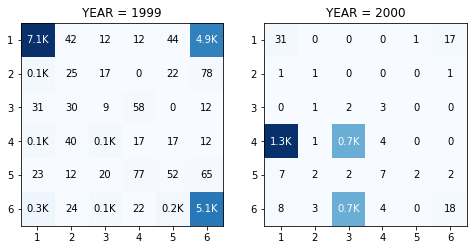

In [58]:
%%capture --no-display
### year 1999 and 2000 ###
with open('temp/frames.pickle','rb') as f:
     frames = pickle.load(f)

# 1999
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(121)
count, year = frames[7]
ax.clear()
ax.imshow(count, cmap='Blues')

column = range(7)
row = range(7)
ax.set_xticklabels(row)
ax.set_yticklabels(column)

for i in range(len(count)):
    for j in range(len(count[i])):
        if count[i][j] >= 100000:
            label_text = str(np.round(count[i][j]/10**6,1)) + 'M'
        elif count[i][j] >= 100:
            label_text = str(np.round(count[i][j]/10**3,1)) + 'K'
        else:
            label_text = str(int(np.round(count[i][j],0)))
        
        if count[i][j] < np.average(count):
            text = ax.text(j, i, label_text, ha="center", va="center", color='k')
        else:
            text = ax.text(j, i, label_text, ha="center", va="center", color='w')

ax.set_title("YEAR = {}".format(year))

# 2000
ax1 = fig.add_subplot(122)
count, year = frames[8]
ax1.clear()
ax1.imshow(count, cmap='Blues')

column = range(7)
row = range(7)
ax1.set_xticklabels(row)
ax1.set_yticklabels(column)

for i in range(len(count)):
    for j in range(len(count[i])):
        if count[i][j] >= 100000:
            label_text = str(np.round(count[i][j]/10**6,1)) + 'M'
        elif count[i][j] >= 100:
            label_text = str(np.round(count[i][j]/10**3,1)) + 'K'
        else:
            label_text = str(int(np.round(count[i][j],0)))

        if count[i][j] < np.average(count)*2:
            text = ax1.text(j, i, label_text, ha="center", va="center", color='k')
        else:
            text = ax1.text(j, i, label_text, ha="center", va="center", color='w')

ax1.set_title("YEAR = {}".format(year));

fig.savefig('figures/1999_and_2000.svg', format='svg')

# Motif and degree distribution

In [59]:
%%capture --no-display   
### Get degree distribution fit
l = list()
for G in graphs:
    country_ed = dict()
    for edge in G.edges():
        if country_ed.get(edge[0]) is None:
            country_ed[edge[0]] = 0

        if country_ed.get(edge[1]) is None:
            country_ed[edge[1]] = 0

        country_ed[edge[0]] += 1
        country_ed[edge[1]] += 1

    name = list()
    co = list()
    for n, c in country_ed.items():
        name.append(n)
        co.append(c)

    country_edge_count = pd.Series(co, name)
    l.append(country_edge_count)

table = pd.concat(l, axis=1)
country_edge_count = table.mean(axis=1)

degree_fit = powerlaw.Fit(country_edge_count, xmin=(1,10), discrete=True)

In [60]:
def get_country_count(count_dict):
    country_count = dict()

    for row_i in range(len(motifs)):
        for col_i in range(len(motifs[row_i])):
            # calculate for each country
            for country in graphs[0].nodes():
                c = 0
                for key, co in count_dict[row_i][col_i].items():
                    if country in key:
                        c = c + co

                if country_count.get(country) is None:
                    country_count[country] = np.zeros((6,6))

                country_count[country][row_i][col_i] = c
    return country_count

In [61]:
%%capture --no-display   
### Get motif distribution fit
l = list()
for count_dict in dict_table:
    country_count = get_country_count(count_dict)
    n = list()
    c = list()
    for name, ar in country_count.items():
        n.append(name)
        c.append(sum(sum(ar)))

    country_motif_count = pd.Series(c,n)
    l.append(country_motif_count)
    
table = pd.concat(l, axis=1)
country_motif_count = table.mean(axis=1)
    
data = np.array(country_motif_count[country_motif_count>0], dtype=int)
motif_fit = powerlaw.Fit(data, xmin=(1,10), discrete=True)

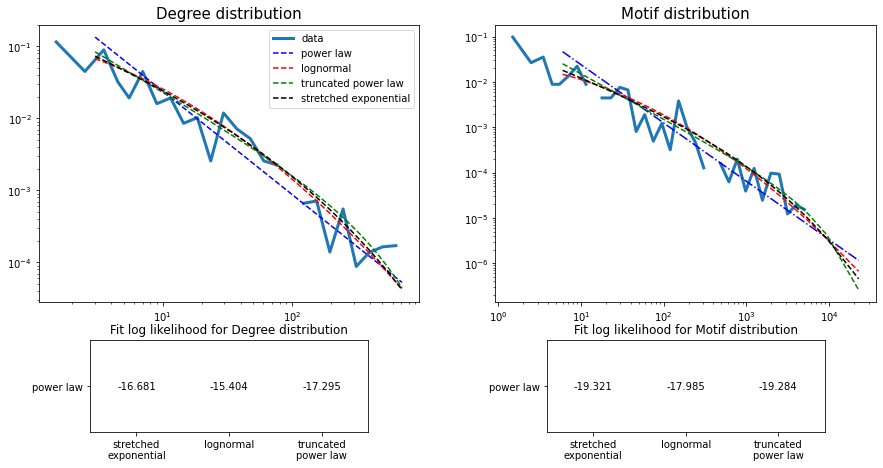

In [64]:
%%capture --no-display
### Combine the 2 graphs above ###
distributions = ['stretched_exponential', 'lognormal', 'truncated_power_law']
distribution_labels = ['stretched\nexponential', 'lognormal', 'truncated\npower law']
plt.rcParams["figure.figsize"] = (15,7.5)
fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3, 1]})
ax.set_title('Degree distribution', fontsize=15);

powerlaw.plot_pdf(country_edge_count, label='data', linewidth=3, ax=ax)

degree_fit.power_law.plot_pdf(color='b', linestyle='--', ax=ax, label='power law')
degree_fit.lognormal.plot_pdf(color='r', linestyle='--', ax=ax, label='lognormal')
degree_fit.truncated_power_law.plot_pdf(color='g', linestyle='--', ax=ax, label='truncated power law')
degree_fit.stretched_exponential.plot_pdf(color='k', linestyle='--', ax=ax, label='stretched exponential')

ax.legend();

##
ax2.set_title('Motif distribution', fontsize=15);

powerlaw.plot_pdf(data, label='data', linewidth=3, ax=ax2)

motif_fit.power_law.plot_pdf(color='b', linestyle='-.', ax=ax2, label='power law')
motif_fit.lognormal.plot_pdf(color='r', linestyle='--', ax=ax2, label='lognormal')
motif_fit.truncated_power_law.plot_pdf(color='g', linestyle='--', ax=ax2, label='truncated power law')
motif_fit.stretched_exponential.plot_pdf(color='k', linestyle='--', ax=ax2, label='stretched exponential');


###### Degree
log_likelihood = np.empty((1, len(distributions)))
for i in range(len(distributions)):
    R, p = degree_fit.distribution_compare('power_law', distributions[i])
    log_likelihood[0][i] = R
###
ax3.imshow(log_likelihood, cmap='Blues', alpha=0, vmin=1, vmax=1)

ax3.set_xticks(ticks = range(len(distributions)))
ax3.set_xticklabels(distribution_labels)

ax3.set_yticks(ticks = range(1))
ax3.set_yticklabels(['power law'])

for i in range(len(distributions)):
    text = ax3.text(i, 0, '{}'.format(np.round(log_likelihood[0][i],3)),
       ha="center", va="center", color='k')
ax3.set_title('Fit log likelihood for Degree distribution')           

###### Motif
log_likelihood2 = np.empty((1, len(distributions)))
for i in range(len(distributions)):
    R, p = motif_fit.distribution_compare('power_law', distributions[i])
    log_likelihood2[0][i] = R

###
ax4.imshow(log_likelihood2, cmap='Blues', alpha=0, vmin=1, vmax=1)

ax4.set_xticks(ticks = range(len(distributions)))
ax4.set_xticklabels(distribution_labels)

ax4.set_yticks(ticks = range(1))
ax4.set_yticklabels(['power law'])

for i in range(len(distributions)):
    text = ax4.text(i, 0, '{}'.format(np.round(log_likelihood2[0][i],3)),
       ha="center", va="center", color='k')
ax4.set_title('Fit log likelihood for Motif distribution');

fig.savefig('figures/degree_and_motif_distributions.svg', format='svg')

# Different time intervals

In [72]:
## count motifs at different delta intervals
day_delta = [3, 7, 30, 120]
def different_delta(graphs):
    
    count0 = list()
    
    for k in range(len(day_delta)):
        table = list()
        for G in graphs:    
            count_dict = list()
            pool = mp.Pool(mp.cpu_count())
            results = pool.starmap_async(dnx.count_temporal_motif, [(G, seq, day_delta[k]*86400) for seq in mot]).get()
            pool.close()
            count_dict=[results[0:6], results[6:12], results[12:18], results[18:24], results[24:30], results[30:36]]

            table.append(results)

        count_table = pd.DataFrame(table, columns=range(1,37))
        a = count_table.mean()
        count = [list(a[0:6]), list(a[6:12]), list(a[12:18]), list(a[18:24]), list(a[24:30]), list(a[30:36])]    

        count0.append(count)
    
    return count0

def plot_interval_motifs(count0):
    diffcount = list()
    diffcount.append(np.array(count0[0]))
    diffcount.append(np.array(count0[1])-np.array(count0[0]))
    diffcount.append(np.array(count0[2])-np.array(count0[1]))
    diffcount.append(np.array(count0[3])-np.array(count0[2]))

    fig = plt.figure(figsize=(8, 8))

    for k in range(len(diffcount)):
        diff = diffcount[k]
        ax = fig.add_subplot(2,2,k+1)
        ax.imshow(diff, cmap='Blues')

        column = range(7)
        row = range(7)
        ax.set_xticklabels(row)
        ax.set_yticklabels(column)

        for i in range(len(diff)):
            for j in range(len(diff[i])):
                if diff[i][j] >= 100000:
                    label_text = str(np.round(diff[i][j]/10**6,1)) + 'M'
                elif diff[i][j] >= 100:
                    label_text = str(np.round(diff[i][j]/10**3,1)) + 'K'
                else:
                    label_text = str(int(np.round(diff[i][j],0)))
                
                if diff[i][j] < np.average(diff) *2.3:
                    text = ax.text(j, i, label_text, ha="center", va="center", color='k')
                else:
                    text = ax.text(j, i, label_text, ha="center", va="center", color='w')

        if k == 0:
            ax.set_title("[{}, {}] days".format(0, day_delta[k]))
        else:
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.set_title("({}, {}] days".format(day_delta[k-1], day_delta[k]))
    
    fig.savefig('figures/different_delta_count.svg', format='svg')

In [67]:
count0 = different_delta(graphs)

In [69]:
with open('temp/different_intervals.pickle','wb') as f:
    pickle.dump(count0, f)

In [70]:
with open('temp/different_intervals.pickle','rb') as f:
    count0 = pickle.load(f)

<ipython-input-72-2777ad5ea85f>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(row)
<ipython-input-72-2777ad5ea85f>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(column)


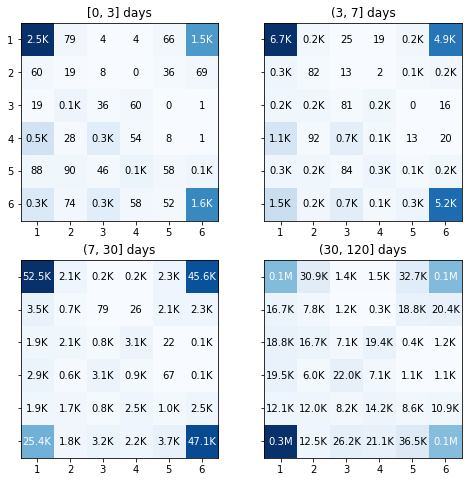

In [73]:
plot_interval_motifs(count0)